In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### 아버지와 아들의 키 - galton

In [16]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4


In [17]:
# 특정조건 df의 열 selection
df1=df[df.Gender =='M'][['Father','Height']]
df1

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5
...,...,...
890,68.5,72.0
891,68.5,70.5
892,68.5,68.7
893,68.5,68.5


In [18]:
# 'Height' column을 'Son'으로 변경
df1.rename(columns={'Height':'Son'}, inplace=True)
df1.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [19]:
# inch를 cm로
df2 =df1*2.54
df2.head(10)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
11,190.50,173.990
15,190.50,182.880
16,190.50,175.260
17,190.50,172.720
22,187.96,194.310


- 산점도 그리기

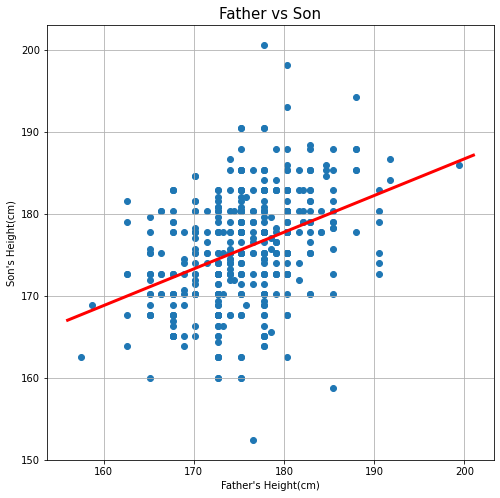

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(df2.Father, df2.Son)
plt.plot([156,201],[156*fp1[0]+fp1[1],201*fp1[0]+fp1[1]], 'r-', lw=3)  # 두점사이의 선 그리기
plt.title('Father vs Son', fontsize=15)
plt.xlabel("Father's Height(cm)")
plt.ylabel("Son's Height(cm)")
plt.grid()
plt.show()

- 회귀선 구하기 : Numpy polyfit

In [20]:
fp1 = np.polyfit(df2.Father, df2.Son, 1) #1차식으로 아버지와 아들의 키 관계표현
fp1  #(기울기, 절편)

array([ 0.44774792, 97.17763701])

- sklearn

In [22]:
from sklearn.linear_model import LinearRegression

In [25]:
# X의 shape 1차원 -> 2차원으로 바꿔줘야함
df2.Father.values.shape

(465,)

In [26]:
lr = LinearRegression()
lr.fit(df2.Father.values.reshape(-1,1),df2.Son.values)

LinearRegression()

In [27]:
#기울기
lr.coef_

array([0.44774792])

In [28]:
# 절편
lr.intercept_

97.17763700739346

In [30]:
lr._residues

17556.59951549399

In [33]:
# R squared - 성능평가 요소
lr.score(df2.Father.values.reshape(-1,1), df2.Son.values)


0.15312927478306992

In [43]:
from sklearn.metrics import r2_score
r2_score( df2.Son.values,df2.Father.values)

-0.08035459825652325